<a href="https://colab.research.google.com/github/Arjun-Jayakrishna/food-ticket-checker/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing libraries
import torch
import numpy as np
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

print('Libraries Imported')

Libraries Imported


In [ ]:
use_cuda = True

#Artificial Neural Network Architecture (aka MLP)
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # Note that you are free to add more layers
        self.fc1 = nn.Linear(150528, 128) # input sample size, output sample size, bias (bool)
        self.fc2 = nn.Linear(128, 30)
        self.fc3 = nn.Linear(30, 4)

    def forward(self, img):
        flattened = img.view(-1, 150528) # Change these numbers (except -1)
        activation1 = F.relu(self.fc1(flattened))
        activation2 = F.relu(self.fc2(activation1))
        output = self.fc3(activation2)
        return output

net = Classifier()
print(net)

Classifier(
  (fc1): Linear(in_features=150528, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=4, bias=True)
)


In [ ]:
def get_accuracy(model, data):

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=32):
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

done


In [ ]:
def train(model, data, batch_size=32, num_epochs=5):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size) # compute *average* loss
            train_acc.append(get_accuracy(model, data)) # compute training accuracy
            val_acc.append(get_accuracy(model, val_dataset))   # compute validation accuracy
            n += 1

    # matplotlib code stuff
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Accuracy Pie Chart")
    plt.pie(np.array([train_acc[-1], 1-train_acc[-1]]), labels = ["Correct Predictions", "Incorrect Predictions"])
    plt.show()

    plt.title("Validation Accuracy Pie Chart")
    plt.pie(np.array([val_acc[-1], 1-val_acc[-1]]), labels = ["Correct Predictions", "Incorrect Predictions"])
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

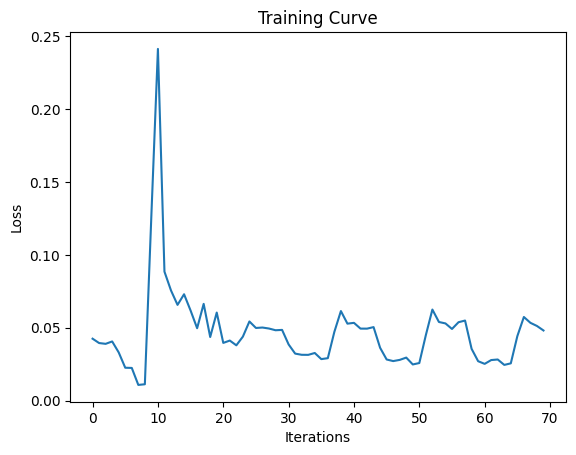

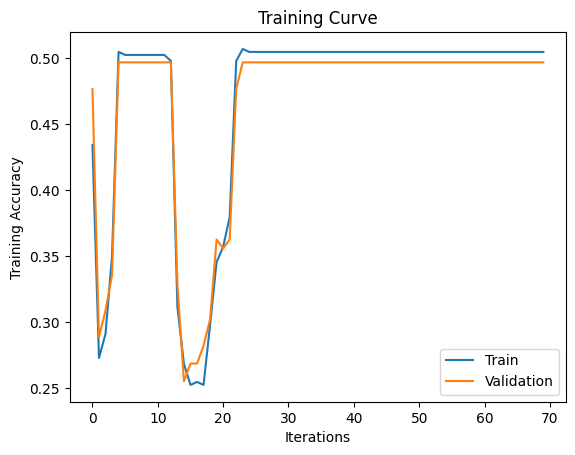

Final Training Accuracy: 0.5045454545454545
Final Validation Accuracy: 0.4966442953020134


In [ ]:
base_path = '/content/drive/MyDrive/GEC ASSIGNMENT'

    # Transform Settings to configure the pixels of the image
transformation = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# This function associates the images in our folders with their respective labels
# and prepares them to be loaded into our ML model!!
train_dataset = datasets.ImageFolder(base_path + '/Training', transform=transformation)
val_dataset = datasets.ImageFolder(base_path + '/Validation', transform=transformation)
test_dataset = datasets.ImageFolder(base_path + '/Testing', transform=transformation)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

# Prepare Dataloader
# batch_size = 30 # something you have to choose and optimize
num_workers = 1

# val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
#                                          num_workers=num_workers, shuffle=True)

# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
#                                               num_workers=num_workers, shuffle=True)

myModel = Classifier()

train(myModel, train_dataset)

In [ ]:
torch.save(myModel.state_dict(), "saved_model")

In [ ]:
myModel.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-4.7005e-04,  2.8506e-04,  6.6080e-04,  ..., -1.0837e-03,
                       -8.0335e-04,  1.8905e-03],
                      [ 3.1541e-03,  7.2968e-04, -3.5560e-05,  ..., -1.3711e-03,
                        3.0238e-04,  3.8854e-04],
                      [ 5.6877e-03,  5.1703e-03,  2.4800e-03,  ...,  6.1124e-03,
                        3.5636e-03,  2.6176e-03],
                      ...,
                      [ 1.2261e-03, -8.9191e-04,  4.2827e-04,  ...,  3.0264e-03,
                       -1.3309e-04,  3.2125e-03],
                      [ 2.5715e-03,  2.5869e-03,  1.0861e-03,  ..., -1.6206e-03,
                        7.0468e-04, -2.0889e-03],
                      [ 1.8901e-03,  2.0691e-03, -2.8879e-04,  ..., -8.4371e-04,
                        4.3462e-04,  9.2478e-04]])),
             ('fc1.bias',
              tensor([-2.8075e-03,  1.0981e-03, -3.9670e-03, -2.1922e-03, -3.0259e-03,
                      -3.5247e-03, -1.9023e